# Comparison of inter-subject alignment techniques


### Xu Wu


### Supervisor: Leo Michalke, Prof. Dr. Jochem Rieger

## MCCA


- not just 2 datasets $X_1$ and $X_2$, but M-CCA maximizes the pairwise correlations between M sets of $X_1$... $X_M$ (inter-subject correlation)

- $ X_k \in \mathbb{R}^{T \times m_k}$ with $k$ = 1 ... $M$:M participants; $T$; number of samples;$m_k$: number of retained PCA components

- **Objective to MCCA:** find $M$ weight vectors $ h_k \in \mathbb{R}^{m_k \times 1} $ that provide the maximum pairwise correlation of cannoical variables $y_k$ after the projection $y_k = X_{k}h_k$
- $argmax_{h_{1}...h_{M}}\rho = \frac{1}{M(M-1)}\sum_{k,l=1,k\neq l}^{M}{y_{k}^{T}y_{l}}=\frac{1}{M(M-1)}\sum_{k,l=1,k\neq l}^{M}{h_{k}^{T}R_{kl}h_{l}} $
- additional constraint $\frac{1}{M}\sum_{k=1}^{M}{h_{k}^{T}R_{kk}h_{k}=1}$
- $R_{kl} = X_{k}^{T}X_l$ is the cross-covariance matrix of participants $k$ and $l$

<div style="text-align: right; position: fixed; bottom: 0; right: 0; color: olive;">
    (Michalke, et al., 2023)
</div>

- **Another Formulation:** 

\begin{array}{ll}
\text{minimize} & \sum_{i < j} \| \mathbf{X}_{i}\mathbf{R}_{i} - \mathbf{X}_{j}\mathbf{R}_{j} \|_{F}^{2} \\
\text{subject to} & \mathbf{R}_{k}^{T}\mathbf{X}_{k}^{T}\mathbf{X}_{k}\mathbf{R}_{k} = \mathbf{I}
\end{array}

<div style="text-align: right; position: fixed; bottom: 0; right: 0; color: olive;">
    (Xu, et al., 2012, from James Haxby's Lab)
</div>

![MCCA](MCCA_on_MEG.png)

## Training and Test

### Classifier

$$ P(y = k | \textbf{CC}) = \frac{\exp(\beta_{k0} + \beta_{k1} \times CC_1 + \beta_{k2} \times CC_2 + \cdots + \beta_{k50} \times CC_{50})}{\sum_{j=1}^{K} \exp(\beta_{j0} + \beta_{j1} \times CC_1 + \beta_{j2} \times CC_2 + \cdots + \beta_{j50} \times CC_{50})}$$

### On the test data


<b>Some math:</b> To Solve this linear equation, $\mathbf{x}$ is unkown
&nbsp;
$$ \mathbf{A x} = \mathbf{y} $$
&nbsp;
more general solution to this equation: <b>minimum norm solution</b>
$$ \quad \quad \quad \quad \quad \quad \quad \quad \quad\mathbf{A^+} = (\mathbf{A^T}\mathbf{A})^{-1}\mathbf{A^T} \quad \text{(Only full rank, square matrices)} $$
$$ \text{or} \quad \mathbf{A^+} = V_r \Sigma ^{-1} U_{r}^T \quad \text{(More general)} $$ 
$$ \text{We will get:} \quad\mathbf{x^*} = \mathbf{A^+}\mathbf{y} $$
where: $\mathbf{A^+}$ Moore-Penrose pseudo inverse, $\mathbf{x^*}$ is the minimum norm solution


<div style="text-align: right; position: fixed; bottom: 0; right: 0; color: olive;">
    (Calafiore & Ghaoui 2014, Optimization Models,Chap.6)
</div>
&nbsp;
<center><b>Actually in MCCA Problem</b></center>
$$ \mathbf{CC \cdot \beta} = \mathbf{y_{pred}} $$




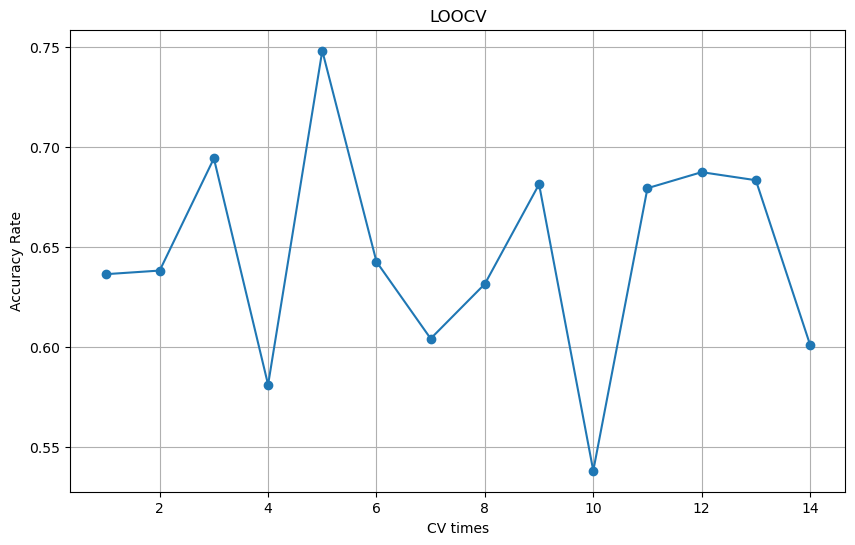

In [1]:
import matplotlib.pyplot as plt

# Data
data = {
    1: 0.6362193616646094,
    2: 0.6380385487528345,
    3: 0.6941427666198309,
    4: 0.580940243557066,
    5: 0.748007098007098,
    6: 0.6424540133779264,
    7: 0.6039924380787594,
    8: 0.6313692480359148,
    9: 0.681208914542248,
    10: 0.5379172714078374,
    11: 0.6792445350549325,
    12: 0.6872615039281706,
    13: 0.6832313965341488,
    14: 0.6009587569220597
}

# Separating keys and values
keys = list(data.keys())
values = list(data.values())

# Creating a line plot
LOOCV_MCCA = plt.figure(figsize=(10, 6))
plt.plot(keys, values, marker='o')
plt.title('LOOCV')
plt.xlabel('CV times')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()


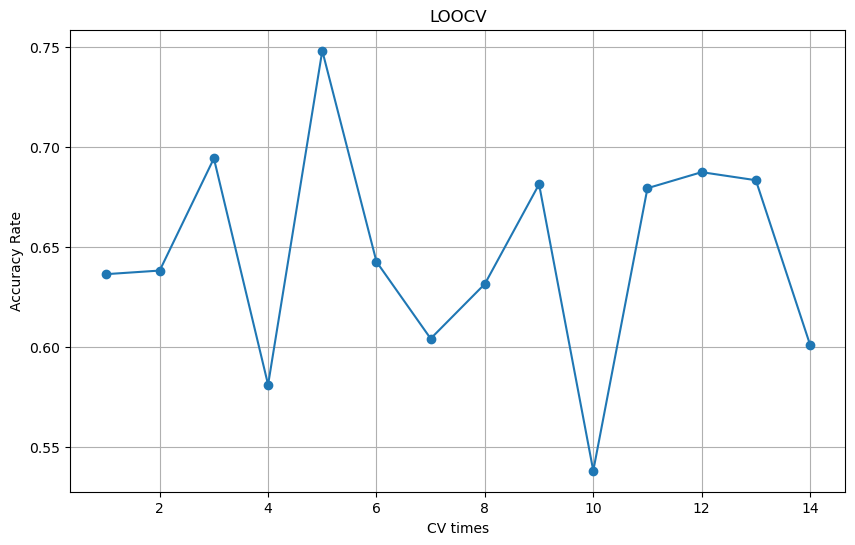

In [2]:
LOOCV_MCCA

![Fig1,Haxby, 2020](Results.png)

## Hyperalignment

$ [{\rm HA}]\qquad \matrix{ {\rm minimize}\ {\sum}_{i < j}\Vert {\bf X}_{i}{\bf R}_{i}-{\bf X}_{j}{\bf R}_{j}\Vert_{\rm F}^{2}\cr {\rm subject\ to}\ {\bf R}_{k}^{T}{\bf R}_{k}={\bf I}.\hfill}$

where:
- $X_{i}$and $X_{j}$ are the data matrices for subjects $i$ and $j$, respectively. Each matrix contains the neural activity patterns measured from a set of sensors or regions over time or trials. Each matrix is of size $m×n$, where $m$ is the number of features (e.g., voxels, sensors) and $n$ is the number of samples (e.g., time points).
- $ \mathbf{R}_{i} $ and $ \mathbf{R}_{j} $ are the transformation matrices for subjects $ i $ and $ j $, which map their respective data into the common space.
- $ \left\| \cdot \right\|_{\rm F}$ denotes the Frobenius norm, which measures the size of a matrix.
- $ \mathbf{I} $ is the identity matrix, ensuring that the transformation matrices are orthogonal.

<div style="text-align: right; position: fixed; bottom: 0; right: 0; color: olive;">
    (Haxby, et al., 2020)
</div>

![Fig1,Haxby, 2020](elife-56601-fig1-v1.jpg)

<div style="text-align: right; position: fixed; bottom: 0; right: 0; color: olive;">
    (Haxby, et al., 2020)
</div>

![Fig2,Haxby 2020](elife-56601-fig2-v1.jpg)

<div style="text-align: right; position: fixed; bottom: 0; right: 0; color: olive;">
    (Haxby, et al., 2020)
</div>

$$ [{\rm HA}]\qquad
\begin{array}{ll}
\text{minimize} & \sum_{i < j} \| \mathbf{X}_{i}\mathbf{R}_{i} - \mathbf{X}_{j}\mathbf{R}_{j} \|_{F}^{2} \\
\text{subject to} & \mathbf{R}_{k}^{T}\mathbf{R}_{k}^{}= \mathbf{I}
\end{array}$$

where:
- $X_{i}$and $X_{j}$ are the data matrices for subjects $i$ and $j$, respectively. Each matrix contains the neural activity patterns measured from a set of sensors or regions over time or trials. Each matrix is of size $m×n$, where $m$ is the number of features (e.g., voxels, sensors) and $n$ is the number of samples (e.g., time points).
- $ \mathbf{R}_{i} $ and $ \mathbf{R}_{j} $ are the transformation matrices for subjects $ i $ and $ j $, which map their respective data into the common space.
- $ \left\| \cdot \right\|_{\rm F}$ denotes the Frobenius norm, which measures the size of a matrix.
- $ \mathbf{I} $ is the identity matrix, ensuring that the transformation matrices are orthogonal.

C:\Users\yevge\AppData\Local\Temp\ipykernel_15572\117294477.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, rotation=45)
C:\Users\yevge\AppData\Local\Temp\ipykernel_15572\117294477.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


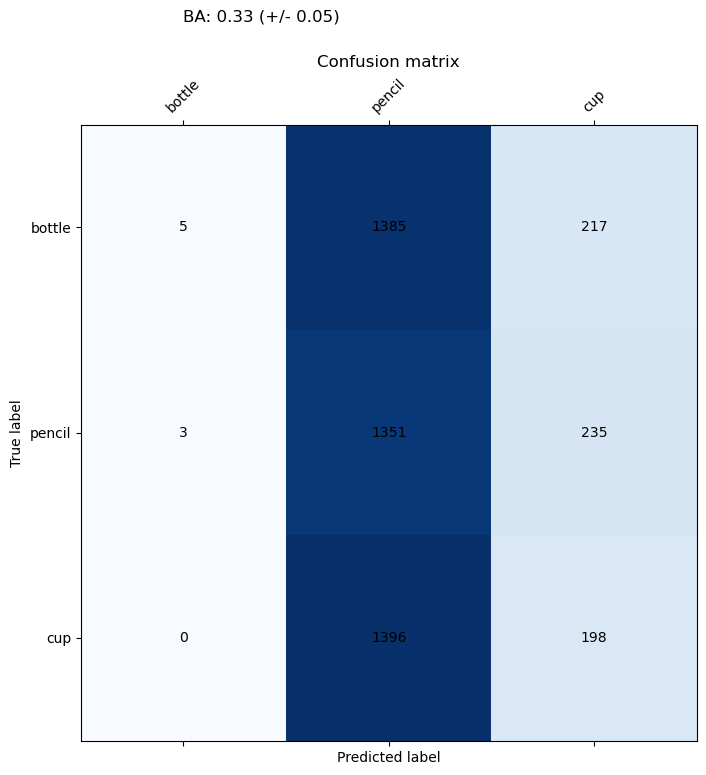

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the confusion matrix
confusion_matrix = np.array([[5, 1385, 217],
                             [3, 1351, 235],
                             [0, 1396, 198]])

# Define the labels for the confusion matrix
labels = ['bottle', 'pencil', 'cup']

# Calculate the Balanced Accuracy from the confusion matrix
row_sums = confusion_matrix.sum(axis=1)
correct_preds = np.diag(confusion_matrix)
balanced_accuracy = np.mean(correct_preds / row_sums)


# Create the confusion matrix plot
fig3, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

# Add the text labels
for (i, j), val in np.ndenumerate(confusion_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')


# Add labels to the axes
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

# Set axis labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add title
plt.title('Confusion matrix')

# Add balanced accuracy
plt.text(0, -1, f'BA: {balanced_accuracy:.2f} (+/- 0.05)', fontsize=12)

# Show the plot
plt.show()

image_path = 'C:/Users/yevge/balanced_accuracy_graph.png'
fig3.savefig(image_path)

plt.close(fig3)


![Balanced Accuracy of Hyperalignment on MEG]( balanced_accuracy_graph.png)


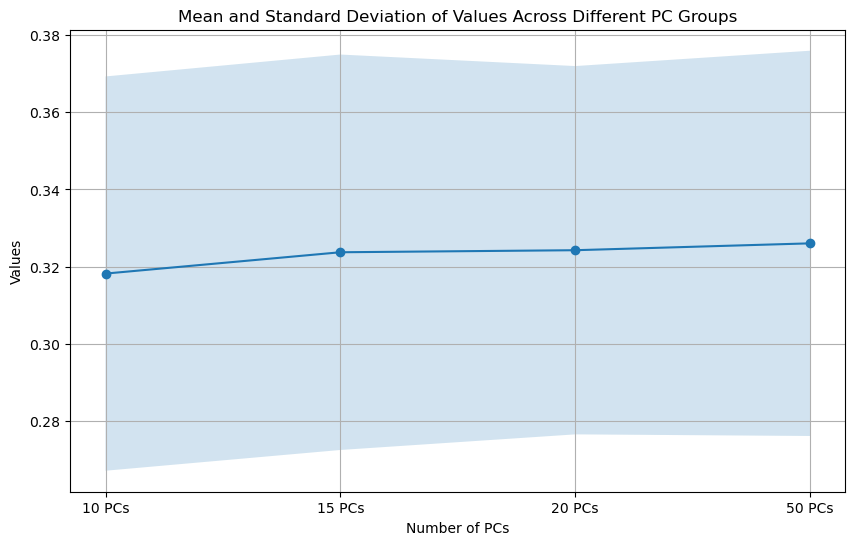

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data provided
data = {
    "10 PCs": [0.28283998283998285, 0.30697113971668727, 0.27288832199546487, 0.3337310621714291,
               0.33109600679694134, 0.2531622531622532, 0.36799749163879597, 0.3310903905924573,
               0.29012345679012347, 0.35391213724547055, 0.2770319303338171, 0.29808842759913096,
               0.3437710437710438, 0.4560822290180089, 0.2744854946689809],
    "15 PCs": [0.3013585013585014, 0.30391465350026453, 0.2862103174603175, 0.3578672918122459,
               0.33715661285754744, 0.2891922225255559, 0.33038368636194726, 0.3407350443782242,
               0.305050505050505, 0.39490941157607823, 0.2607643928398645, 0.2832720682873588,
               0.3377104377104377, 0.45616717635066256, 0.2713722897209136],
    "20 PCs": [0.30102006768673434, 0.3447657673543761, 0.283234126984127, 0.3426348784146949,
               0.35853865760407816, 0.27696029362696034, 0.3481860832404311, 0.3176968182255119,
               0.326374859708193, 0.37647907647907647, 0.2672955974842767, 0.29219514204223684,
               0.3280022446689113, 0.44093328802808934, 0.2596908835440946],
    "50 PCs": [0.28144334811001476, 0.3322753188738024, 0.3213577097505669, 0.3604865916792522,
               0.35516850750495604, 0.2951997451997452, 0.29620726495726496, 0.3049440866416739,
               0.3505611672278339, 0.3854978354978355, 0.2830793420416062, 0.28012901697916986,
               0.33776655443322107, 0.450022652622041, 0.2565225776234951]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculating mean and std for each column
mean_values = df.mean()
std_values = df.std()

# Preparing data for plot
pc_counts = ["10 PCs", "15 PCs", "20 PCs", "50 PCs"]
means = mean_values.values
stds = std_values.values

# Plotting
fig4 = plt.figure(figsize=(10, 6))

plt.plot(pc_counts, means, '-o')
plt.fill_between(pc_counts, means - stds, means + stds, alpha=0.2)

plt.title("Mean and Standard Deviation of Values Across Different PC Groups")
plt.xlabel("Number of PCs")
plt.ylabel("Values")
plt.grid(True)

plt.show()

plt.show()

image_path = 'C:/Users/yevge/balanced_accuracy_graph_with_PCs.png'
fig4.savefig(image_path)

plt.close(fig4)


## But: bad result on Hyperalignment on MEG data

### **BA: 0.33 +/- 0.05**

![Balanced Accuracy of Hyperalignment on MEG]( balanced_accuracy_graph.png)



## Wild Conclusion: Hyperalignment performances not good on MEG data ==> not responsilbe conclusion 

## First Question: Differences Between Hyperalignment and MCCA

The primary distinction between Hyperalignment and MCCA lies in their constraint terms.

1. **Hyperalignment Constraints**:
   - *Orthogonal Transformation*: Hyperalignment allows only rotation, meaning the transform must be orthogonal. 
   - *Geometric Preservation*: Applying an orthogonal transformation preserves geometric properties of the data. 
   - *Relative Positioning*: Rotation keeps the relative positions of data points unchanged.

2. **MCCA Constraints**:
   - *Lenient Constraints*: MCCA has a more lenient constraint, allowing other linear transformations besides rotation.






- **Objective to MCCA:** find $M$ weight vectors $ h_k \in \mathbb{R}^{m_k \times 1} $ that provide the maximum pairwise correlation of cannoical variables $y_k$ after the projection $y_k = X_{k}h_k$
- $argmax_{h_{1}...h_{M}}\rho = \frac{1}{M(M-1)}\sum_{k,l=1,k\neq l}^{M}{y_{k}^{T}y_{l}}=\frac{1}{M(M-1)}\sum_{k,l=1,k\neq l}^{M}{h_{k}^{T}R_{kl}h_{l}} $
- additional constraint $\frac{1}{M}\sum_{k=1}^{M}{h_{k}^{T}R_{kk}h_{k}=1}$
- $R_{kl} = X_{k}^{T}X_l$ is the cross-covariance matrix of participants $k$ and $l$


- **Another Formulation:** 

$$ [{\rm MCCA}]\qquad
\begin{array}{ll}
\text{minimize} & \sum_{i < j} \| \mathbf{X}_{i}\mathbf{R}_{i} - \mathbf{X}_{j}\mathbf{R}_{j} \|_{F}^{2} \\
\text{subject to} & \mathbf{R}_{k}^{T}\mathbf{X}_{k}^{T}\mathbf{X}_{k}\mathbf{R}_{k} = \mathbf{I}
\end{array}$$

$$ [{\rm HA}]\qquad
\begin{array}{ll}
\text{minimize} & \sum_{i < j} \| \mathbf{X}_{i}\mathbf{R}_{i} - \mathbf{X}_{j}\mathbf{R}_{j} \|_{F}^{2} \\
\text{subject to} & \mathbf{R}_{k}^{T}\mathbf{R}_{k}^{}= \mathbf{I}
\end{array}$$

### Interposed Question: Are These Two Formulations of MCCA Equivalent?

- **Objective Comparison**:
  - *Our Formulation*: Aims to achieve the maximum correlation between datasets.
  - *Haxby’s Formulation*: Focuses on minimizing the differences between two datasets.
  - *Equivalent Goals*: Minimizing differences is essentially equivalent to maximizing correlation.

- **Constraint Analysis**:
  - *Haxby’s Constraint*: $\mathbf{R}_{k}^{T}\mathbf{X}_{k}^{T}\mathbf{X}_{k}\mathbf{R}_{k} = \mathbf{I}$ ensures that the transformed datasets have a unit covariance matrix. This implies that dimensions of the transformed dataset are orthogonal to each other and have the same variance. Consequently, Canonical Correlations (CCs) are equally important.
  - *Our Constraint*: $\frac{1}{M}\sum_{k=1}^{M}{h_{k}^{T}R_{kk}h_{k}=1}$ keeps the combination of weighting vectors having an averaging inner product of 1. This is essential to ensure that no single weight vector dominates.
  - *Equivalent Goals*: any of the transformed data does have the same importance 

## **Second thought:** hyperalinment only rotation allowed.
==> May cause unsensitivity to repaid changing data, as more flexible transformation (scaling) might also be needed, not just rotation.Like MEG data, the features may changing significantly within a short time.fMRI data may beinifit from this strict spatial coresponding relation transformation.


==>My previous “cheated” method might be partial evidence? 
(“cheat” : as only rotation allowed in HA, I did PCA on sensors' level before Hyperaligment)
![Balanced Accuracy of Hyperalignment on MEG_PCS]( balanced_accuracy_graph_with_PCs.png)

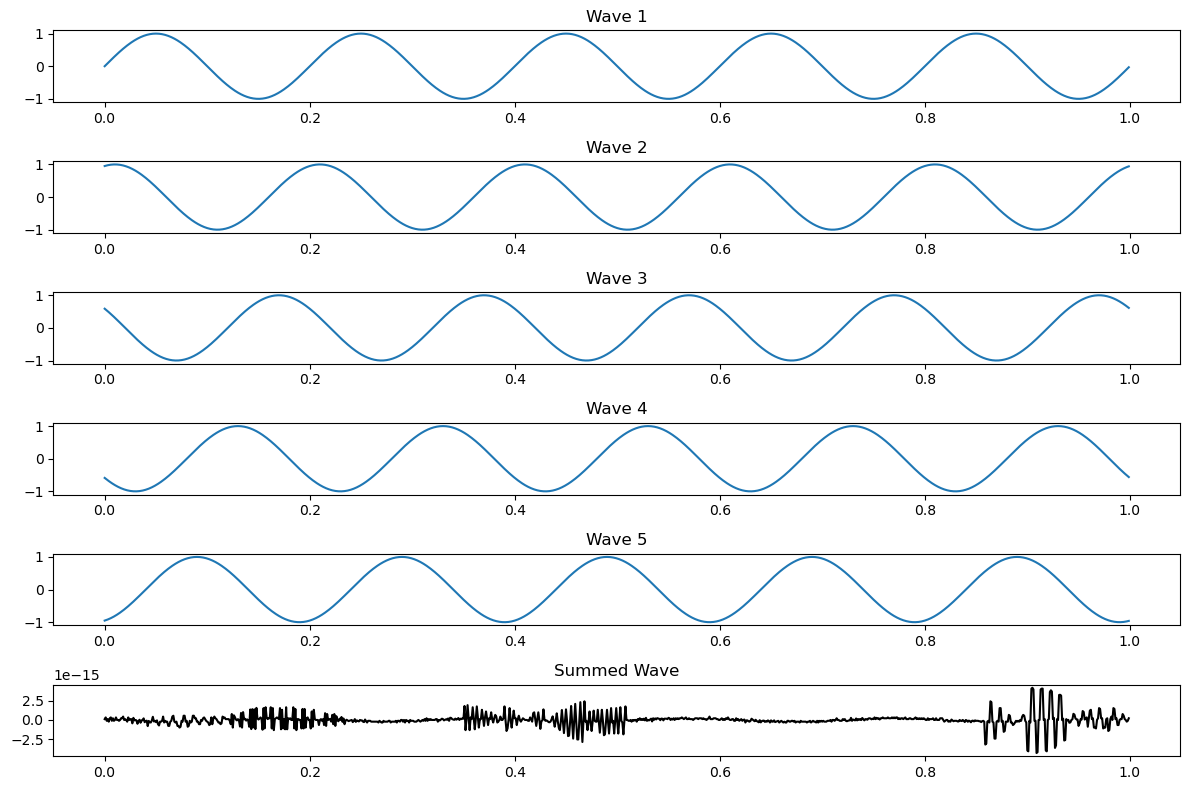

In [9]:
import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 1000 
frequency = 5  
duration = 1  
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)


num_waves = 5  
phase_shifts = np.linspace(0, 2*np.pi, num_waves, endpoint=False) 
waves = [np.sin(2 * np.pi * frequency * time + phase) for phase in phase_shifts]
summed_wave = np.sum(waves, axis=0)

# plot
fig5 = plt.figure(figsize=(12, 8))
for i, wave in enumerate(waves):
    plt.subplot(num_waves+1, 1, i+1)
    plt.plot(time, wave)
    plt.title(f'Wave {i+1}')
plt.subplot(num_waves+1, 1, num_waves+1)
plt.plot(time, summed_wave, color='black')
plt.title('Summed Wave')
plt.tight_layout()
plt.show()


## **Third thought:** Time lag

- **MCCA** is the time information extracted, but **HA** kepts this lag information between diff. sub. In the template updating process, if we take the averaged template, this kind of information will be lost

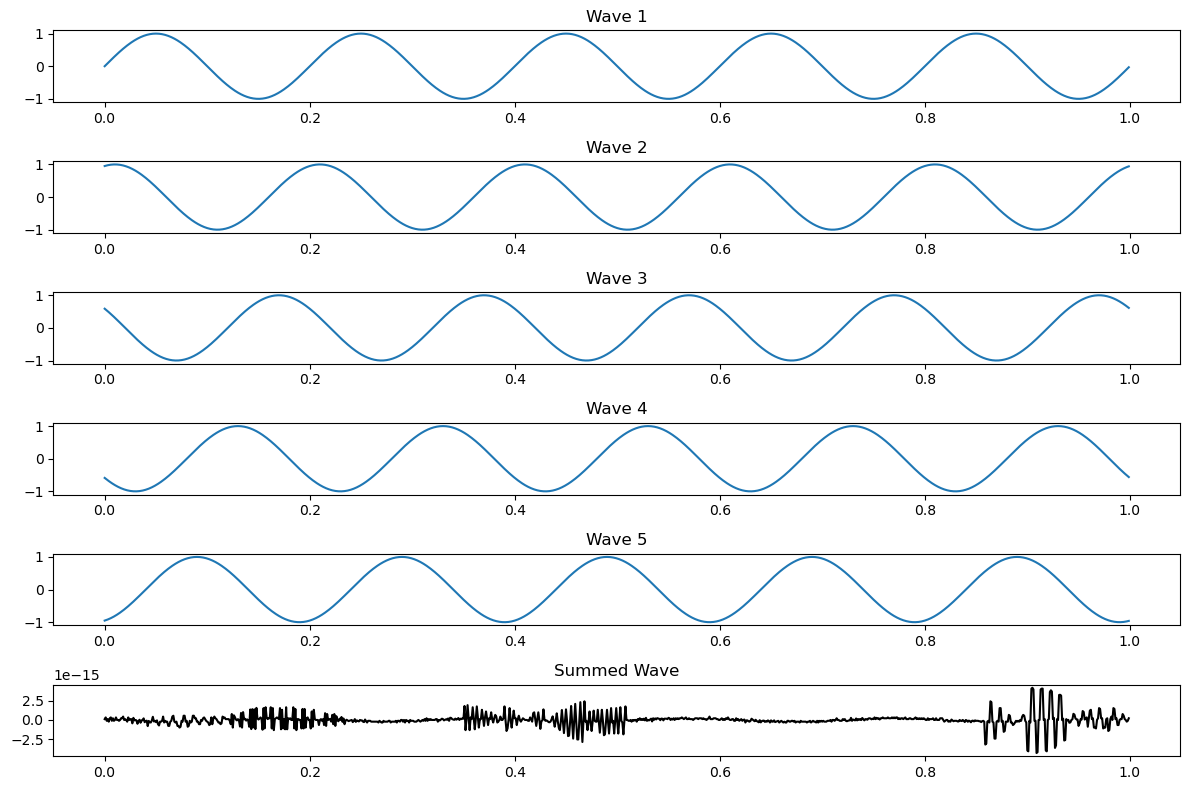

In [10]:
fig5